In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CustomRegression import PimLinearRegression

In [2]:
df = pd.read_csv("./height_weight.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df["Height"] = round(df["Height"], 2)
df["Weight"] = round(df["Weight"], 2)

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.85,241.89
1,Male,68.78,162.31
2,Male,74.11,212.74
3,Male,71.73,220.04
4,Male,69.88,206.35


In [5]:
df.drop("Gender", axis=1, inplace=True)
df.head()

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
3,71.73,220.04
4,69.88,206.35


In [6]:
heights = np.array(df["Height"])
weights = np.array(df["Weight"])
print(heights)
print(weights)

[73.85 68.78 74.11 ... 63.87 69.03 61.94]
[241.89 162.31 212.74 ... 128.48 163.85 113.65]


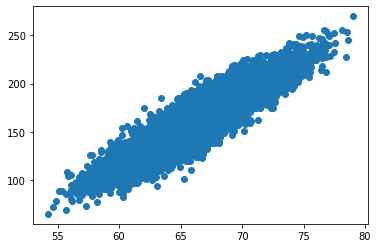

In [7]:
plt.scatter(heights, weights)

In [8]:
lr_model = PimLinearRegression(epoch=5000, dp=0.1, degree=1)

In [9]:
lr_model.fit(heights, weights)

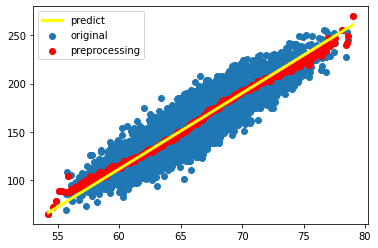

In [10]:
lr_model.evaluation_graph(heights, weights)

In [11]:
pred = lr_model.predict([55, 60, 65, 70])
print(pred)

[71.86315621401252, 111.27563565403267, 150.68811509405293, 190.10059453407302]


In [12]:
lr_model.info()

[7.882495888004039, -361.67411762620964]

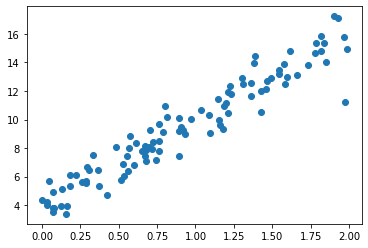

In [33]:
np.random.seed(48)
X = 2 * np.random.rand(100, 1)
y = 4 + 6 * X+np.random.randn(100, 1)

X = np.ravel(X, order="C")
y = np.ravel(y, order="C")

plt.scatter(X, y)

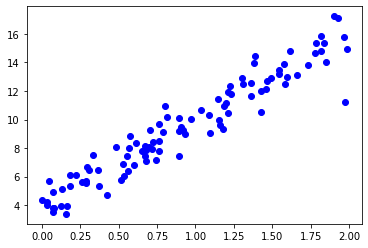

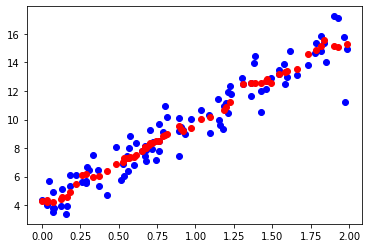

In [34]:
plt.figure(0)
plt.scatter(X, y, color="blue")

plt.figure(1)
plt.scatter(X, y, color="blue")
data = list(zip(X, y))
data = pd.DataFrame(data, columns=["X", "y"])

def duplicate(x):
    duplicate_data = data[(data["X"] > (x - 0.1)) & (data["X"] < (x + 0.1))]["y"]
    return sum(duplicate_data) / len(duplicate_data)

data["y"] = data["X"].apply(lambda x: duplicate(x))
data = data.drop_duplicates(["y"], keep="first")
data = data.reset_index(drop=True)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color="red")

In [35]:
lr_model = PimLinearRegression(epoch=5000, degree=1)

In [36]:
lr_model.fit(X, y)

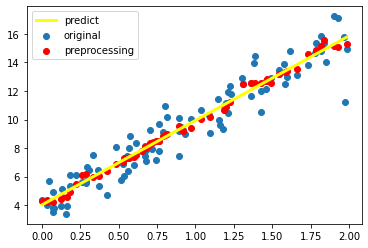

In [37]:
lr_model.evaluation_graph(X, y)

In [38]:
lr_model.info()

[5.92324121968019, 4.0165418516338205]

### sklearn 에서 제공하는 LinearRegression 과 성능 비교

##### PimLinearRegression
- RMSE: 1.0179020196481647

In [39]:
pred = lr_model.predict(X)
pim_rmse = 0
for p, r in zip(pred, y):
    pim_rmse += (p-r) ** 2
pim_rmse = np.sqrt(pim_rmse / len(X))
pim_rmse

1.0179020196481647

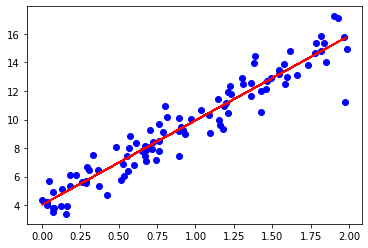

In [40]:
plt.scatter(X, y, color="blue")
plt.plot(X, pred, color="red")

##### Sklearn LinearRegression
- RMSE: 1.0178952191951303

In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
pred = lr_model.predict(X.reshape(-1, 1)).reshape(len(y), )

sk_rmse = 0
for p, r in zip(pred, y):
    sk_rmse += (p-r) ** 2
    
sk_rmse = np.sqrt(sk_rmse / len(X))
sk_rmse

1.0178952191951305

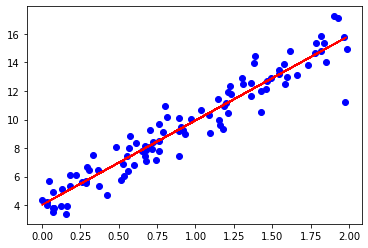

In [42]:
plt.scatter(X, y, color='blue')
plt.plot(X, pred, color="red")
plt.show()

In [46]:
print(pim_rmse - sk_rmse)  # 0.000006800453034250253

6.800453034250253e-06


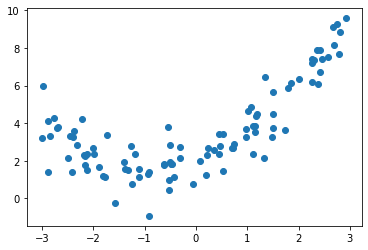

In [44]:
pimDegree2 = PimLinearRegression(epoch=10000, dp=0.1, degree=2)

np.random.seed(1)
X = np.round(6 * np.random.rand(100, 1) - 3, 3)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

X = X.reshape(X.shape[0], )
y = y.reshape(y.shape[0], )

plt.scatter(X, y)

In [45]:
pimDegree2.fit(X, y)

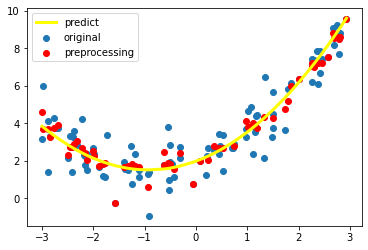

In [47]:
pimDegree2.evaluation_graph(X, y)

In [48]:
pimDegree2.info()

[0.5425569938061754, 1.0050568017383126, 1.985121332034315]

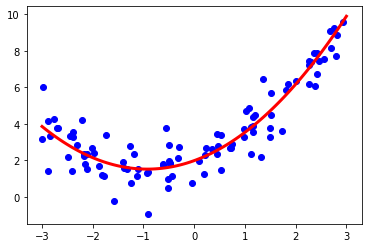

In [49]:
plt.scatter(X, y, color="blue")
plt.plot(np.linspace(-3, 3, 100), pimDegree2.predict(np.linspace(-3, 3, 100)), color="red", linewidth="3.0")

### sklearn Polynomial

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_poly, y.reshape(-1, 1))

LinearRegression()

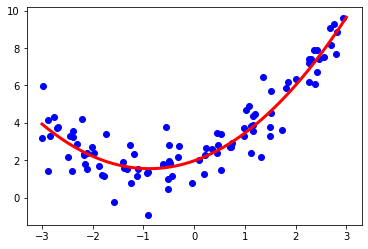

In [52]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
pred = lr_model.predict(poly_features.transform(X_new))

plt.scatter(X, y, color="blue")
plt.plot(np.linspace(-3, 3, 100).reshape(100, 1), pred, color="red", linewidth="3.0")

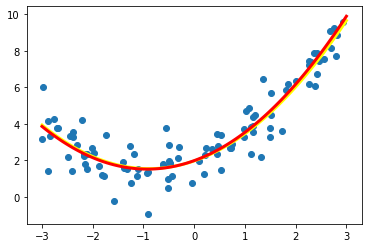

In [53]:
plt.scatter(X, y)
plt.plot(np.linspace(-3, 3, 100).reshape(100, 1), pred, color="yellow", linewidth="3.0")
plt.plot(list(np.linspace(-3, 3, 100)), pimDegree2.predict(list(np.linspace(-3, 3, 100))), color="red", linewidth="3.0")

#### PimLinearRegression
- RMSE: 0.8944538011505542

In [54]:
pim_rmse = 0
pred = pimDegree2.predict(X)
for p, r in zip(pred, y):
    pim_rmse += (p-r) ** 2
pim_rmse = np.sqrt(pim_rmse / len(pred))
pim_rmse

0.8944538011505542

#### Sklearn LinearRegression
- RMSE: 0.8889630668760352

In [55]:
sk_rmse = 0
pred = lr_model.predict(poly_features.transform(X.reshape(-1, 1)))
for p, r in zip(pred, y):
    sk_rmse += (p[0]-r) ** 2
sk_rmse = np.sqrt(sk_rmse / len(pred))
sk_rmse

0.8889630668760352

In [56]:
pim_rmse - sk_rmse

0.00549073427451896